In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [102]:
# common variable

start_date = '2000-01-01'

# tickers
us_index_tickers = ['^GSPC', '^DJI', '^IXIC']
gold_ticker = "GC=F"

# rolling 
SMA1 = 30
SMA2 = 252

# ewm
alpha1 = 0.2
alpha2 = 0.9


### US Index

In [89]:
# index
us_index = yf.Tickers(us_index_tickers)
us_index_data = us_index.history(start=start_date, actions=False)
us_index_data

[*********************100%***********************]  3 of 3 completed


Close                                     High  \
                    ^DJI        ^GSPC         ^IXIC          ^DJI   
Date                                                                
2000-01-03  11357.509766  1455.219971   4131.149902  11522.009766   
2000-01-04  10997.929688  1399.420044   3901.689941  11350.059570   
2000-01-05  11122.650391  1402.109985   3877.540039  11215.099609   
2000-01-06  11253.259766  1403.449951   3727.129883  11313.450195   
2000-01-07  11522.559570  1441.469971   3882.620117  11528.139648   
...                  ...          ...           ...           ...   
2023-03-13  31819.140625  3855.760010  11188.839844  32240.349609   
2023-03-14  32155.400391  3919.290039  11428.150391  32306.589844   
2023-03-15  31874.570312  3891.929932  11434.049805  31906.470703   
2023-03-16  32246.550781  3960.280029  11717.280273  32281.609375   
2023-03-17  31861.980469  3916.639893  11630.509766  32217.320312   

                                                Low               \
                  ^GSPC         ^IXIC          ^DJI        ^GSPC   
Date                                                               
2000-01-03  1478.000000   4192.189941  11305.690430  1438.359985   
2000-01-04  1455.219971   4073.250000  10986.450195  1397.430054   
2000-01-05  1413.270020   3924.209961  10938.669922  1377.680054   
2000-01-06  1411.900024   3868.760010  11098.450195  1392.099976   
2000-01-07  1441.469971   3882.669922  11239.919922  1400.729980   
...                 ...           ...           ...          ...   
2023-03-13  3905.050049  11326.730469  31624.869141  3808.860107   
2023-03-14  3937.290039  11467.019531  31805.400391  3873.629883   
2023-03-15  3894.260010  11447.900391  31429.820312  3838.239990   
2023-03-16  3964.459961  11733.799805  31571.460938  3864.110107   
2023-03-17  3958.909912  11773.110352  31728.699219  3901.270020   

                                  Open                                Volume  \
                   ^IXIC          ^DJI        ^GSPC         ^IXIC       ^DJI   
Date                                                                           
2000-01-03   3989.709961  11501.849609  1469.250000   4186.189941  169750000   
2000-01-04   3898.229980  11349.750000  1455.219971   4020.000000  178420000   
2000-01-05   3734.870117  10989.370117  1399.420044   3854.350098  203190000   
2000-01-06   3715.620117  11113.370117  1402.109985   3834.439941  176550000   
2000-01-07   3711.090088  11247.059570  1403.449951   3711.090088  184900000   
...                  ...           ...          ...           ...        ...   
2023-03-13  10982.799805  31819.929688  3835.120117  11041.459961  429090000   
2023-03-14  11284.929688  32055.289062  3894.010010  11357.730469  391760000   
2023-03-15  11238.440430  31759.869141  3876.739990  11291.169922  420910000   
2023-03-16  11365.490234  31827.650391  3878.929932  11384.870117  440940000   
2023-03-17  11562.629883  32217.320312  3958.689941  11696.339844  712100000   

                                    
                 ^GSPC       ^IXIC  
Date                                
2000-01-03   931800000  1510070000  
2000-01-04  1009000000  1511840000  
2000-01-05  1085500000  1735670000  
2000-01-06  1092300000  1598320000  
2000-01-07  1225200000  1634930000  
...                ...         ...  
2023-03-13  6558020000  6201490000  
2023-03-14  5665870000  5533120000  
2023-03-15  6594010000  5912430000  
2023-03-16  5695790000  5498920000  
2023-03-17  9354280000  7903090000  

[5839 rows x 15 columns]

<Axes: xlabel='Date'>

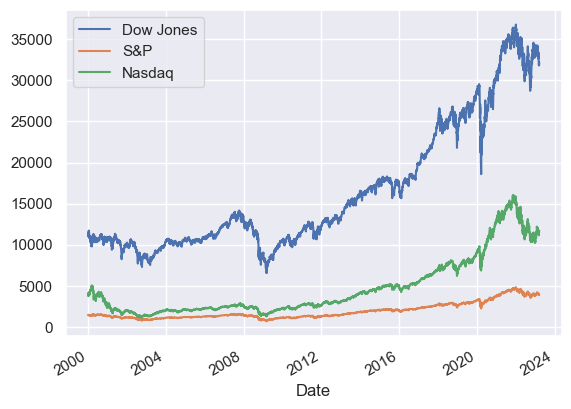

In [91]:
# close plot
us_index_data_close = us_index_data['Close']
us_index_data_close.columns = ['Dow Jones', 'S&P', 'Nasdaq']
us_index_data_close.plot()

In [93]:
# # rolling mean
# us_index_rolling_weekly = us_index_data_close.rolling(SMA1).mean()
# us_index_rolling_monthly = us_index_data_close.rolling(SMA2).mean()
# plt.figure(figsize=(10, 6))
# plt.plot(us_index_rolling_weekly, 'r')
# plt.plot(us_index_rolling_monthly, 'g')
# plt.show()

<Axes: title={'center': 'Weekly returns'}, xlabel='Date'>

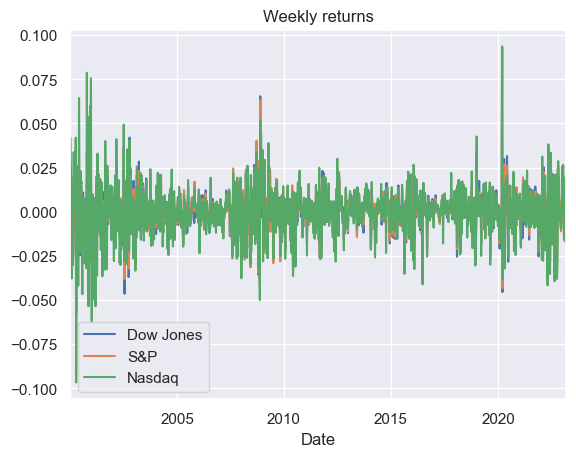

In [112]:
# close returns by weekly
us_index_rets = us_index_data_close.pct_change().fillna(0)
us_index_rets = us_index_rets.resample('W').last()
us_index_rets.plot(title='Weekly returns')

In [ ]:
((1 + us_index_rets).cumprod() - 1).plot(title='cumulative returns')

<Axes: xlabel='Date'>

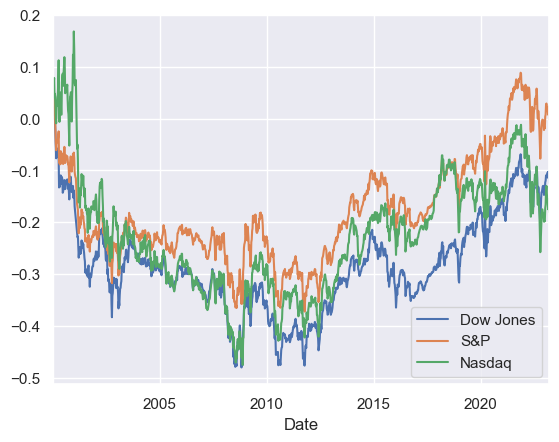

In [95]:
# 로그 수익률
np.log(us_index_rets + 1).cumsum().plot()

<Axes: xlabel='Date'>

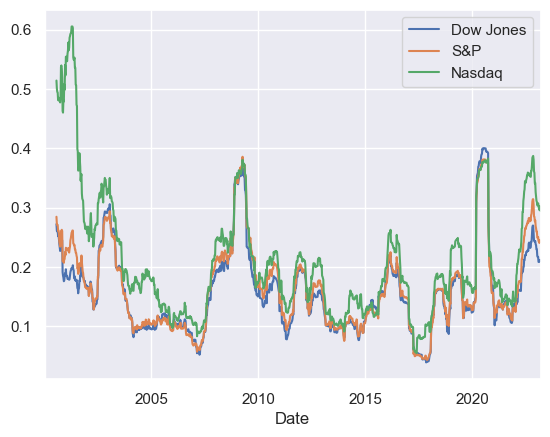

In [96]:
# rolling volatility
(us_index_rets.rolling(SMA1).std() * np.sqrt(252)).plot()

<Axes: xlabel='Date'>

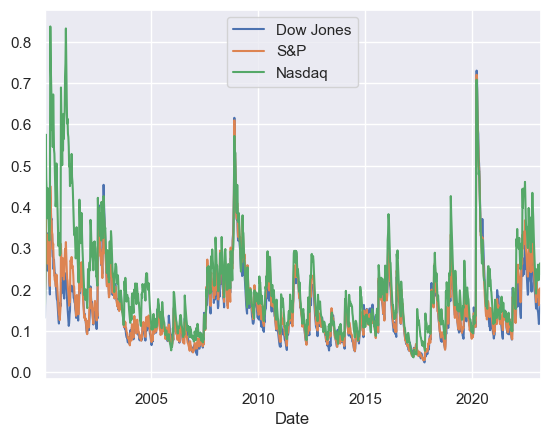

In [99]:
# ewm volatility
(us_index_rets.ewm(alpha=alpha1).std() * np.sqrt(252)).plot()

In [100]:
(us_index_rets.rolling(SMA1).std() * np.sqrt(252)).corr()

,Dow Jones,S&P,Nasdaq
Dow Jones,1.000000,0.981803,0.745434
S&P,0.981803,1.000000,0.814043
Nasdaq,0.745434,0.814043,1.000000


In [101]:
(us_index_rets.ewm(alpha=alpha1).std() * np.sqrt(252)).corr()

,Dow Jones,S&P,Nasdaq
Dow Jones,1.000000,0.978289,0.777540
S&P,0.978289,1.000000,0.843631
Nasdaq,0.777540,0.843631,1.000000


### GOLD

<Axes: xlabel='Date'>

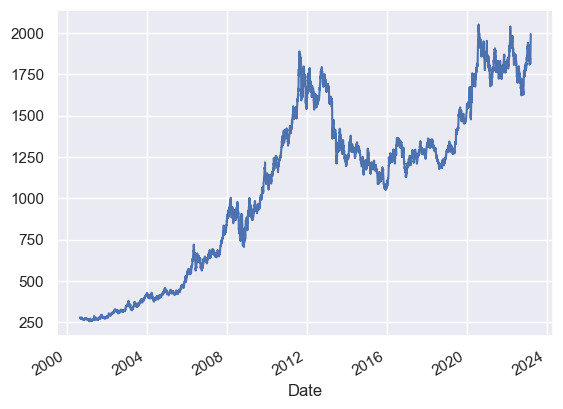

In [104]:
# gold index
gold = yf.Ticker(gold_ticker)
gold_data = gold.history(start=start_date, actions=False)
gold_data_close = gold_data['Close']
gold_data_close.plot()

<Axes: xlabel='Date'>

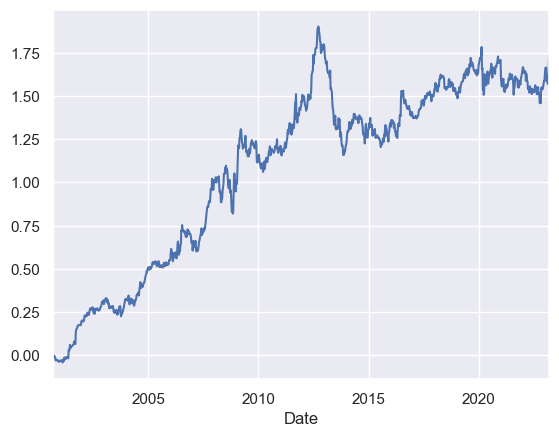

In [105]:
# close returns by month
gold_ret = gold_data_close.pct_change().fillna(0)
gold_ret = gold_ret.resample('W').last()
((1 + gold_ret).cumprod() - 1).plot()

<Axes: xlabel='Date'>

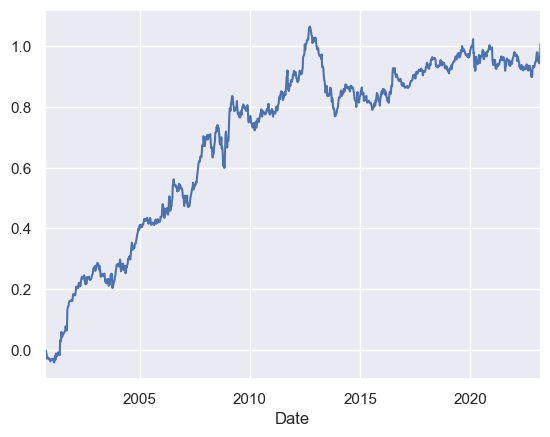

In [106]:
# 로그 수익률
np.log(gold_ret + 1).cumsum().plot()

<Axes: xlabel='Date'>

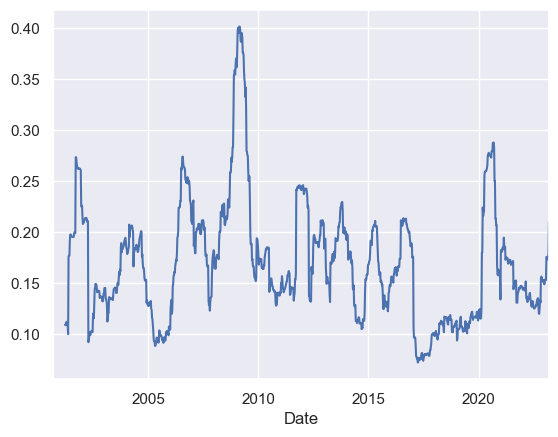

In [107]:
# rolling volatility
(gold_ret.rolling(SMA1).std() * np.sqrt(252)).plot()

<Axes: xlabel='Date'>

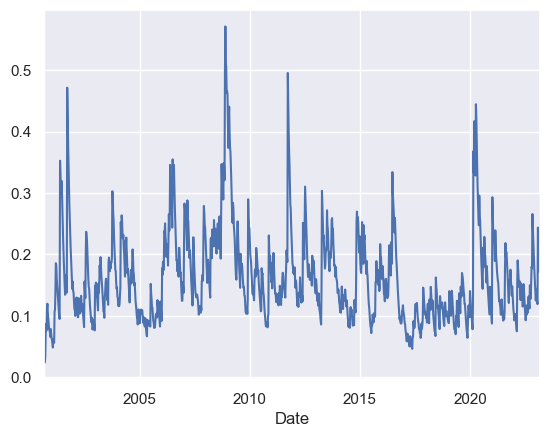

In [108]:
# ewm volatility
(gold_ret.ewm(alpha=alpha1).std() * np.sqrt(252)).plot()